In [9]:
# Time Series Analysis
# Autoregressive Model
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.regression.linear_model import yule_walker
import matplotlib.pyplot as plt

In [13]:
# Simulate AR(1) Time Series Data
np.random.seed(42)
n = 100
epsilon = np.random.normal(0, 1, n)
y = np.zeros(n)
phi = 0.7  # AR coefficient
y[0] = epsilon[0]
for t in range(1, n):
    y[t] = phi * y[t-1] + epsilon[t]

ts_data = pd.Series(y)

# ---------------------------
# 1. Parameter Estimation (OLS, MLE, Yule-Walker)
# ---------------------------
model = AutoReg(ts_data, lags=1).fit()
ols_params = model.params
mle_params = sm.tsa.arima.ARIMA(ts_data, order=(1, 0, 0)).fit().params
yw_params = yule_walker(ts_data, order=1, method='mle')

# ---------------------------
# 2. Compute Test Statistics
# ---------------------------
slope, intercept = ols_params.iloc[1], ols_params.iloc[0]

# ---------------------------
# 3. Compute Common Error Variances
# ---------------------------
residuals = model.resid
residual_variance = np.var(residuals, ddof=1)
standard_error = np.std(residuals, ddof=1)

# ---------------------------
# 4. Model Diagnostics
# ---------------------------
acf_values = acf(ts_data, nlags=10)
pacf_values = pacf(ts_data, nlags=10)
adf_test = adfuller(ts_data)
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# ---------------------------
# 5. Forecasting
# ---------------------------
one_step_forecast = model.predict(start=len(ts_data), end=len(ts_data), dynamic=False)
multi_step_forecast = model.predict(start=len(ts_data), end=len(ts_data)+5, dynamic=False)
forecast_errors = residuals[-5:]
prediction_interval = [multi_step_forecast - 1.96*standard_error, multi_step_forecast + 1.96*standard_error]

# ---------------------------
# 6. Residual Analysis
# ---------------------------
dw_test = durbin_watson(residuals)
jarque_bera_test = jarque_bera(residuals)

# ---------------------------
# 7. Stability Analysis
# ---------------------------
char_roots = np.roots([1, -slope])  # Characteristic equation roots
mean_reversion_time = -1 / np.log(np.abs(slope))

# ---------------------------
# 8. Impulse Response Function
# ---------------------------
impulse_response = [slope ** i for i in range(10)]

# ---------------------------
# 9. Information Criteria
# ---------------------------
aic = model.aic
bic = model.bic

# Display Results
print("OLS Parameters:", ols_params)
print("MLE Parameters:", mle_params)
print("Yule-Walker Parameters:", yw_params)
print("Test Statistics - Slope:", slope, "Intercept:", intercept)
print("Residual Variance:", residual_variance, "Standard Error:", standard_error)
print("ADF Test p-value:", adf_test[1])
print("Ljung-Box Test p-value:", ljung_box_test['lb_pvalue'].values)
print("One-Step Forecast:", one_step_forecast)
print("Multi-Step Forecast:", multi_step_forecast)
print("Durbin-Watson Test:", dw_test)
print("Jarque-Bera Test p-value:", jarque_bera_test[1])
print("Characteristic Roots:", char_roots)
print("Mean Reversion Time:", mean_reversion_time)
print("Impulse Response Function:", impulse_response)
print("AIC:", aic, "BIC:", bic)

OLS Parameters: const   -0.117907
y.L1     0.676115
dtype: float64
MLE Parameters: const    -0.321497
ar.L1     0.672576
sigma2    0.815887
dtype: float64
Yule-Walker Parameters: (array([0.67605477]), np.float64(0.9050337506807552))
Test Statistics - Slope: 0.6761146095425229 Intercept: -0.1179066649100826
Residual Variance: 0.8285902395240496 Standard Error: 0.9102693225216643
ADF Test p-value: 0.0003668699452698551
Ljung-Box Test p-value: [0.70642962]
One-Step Forecast: 100   -0.418616
dtype: float64
Multi-Step Forecast: 100   -0.418616
101   -0.400939
102   -0.388987
103   -0.380907
104   -0.375443
105   -0.371749
dtype: float64
Durbin-Watson Test: 1.7551452233422322
Jarque-Bera Test p-value: 0.7641041057697466
Characteristic Roots: [0.67611461]
Mean Reversion Time: 2.55497882273444
Impulse Response Function: [np.float64(1.0), np.float64(0.6761146095425229), np.float64(0.4571309652368382), np.float64(0.3090729240709015), np.float64(0.20896871937836337), np.float64(0.1412868041091032

In [16]:
# AR Model Derivative Flow
# Flow 1: Parameter Estimation
from statsmodels.regression.linear_model import OLS
import statsmodels.tsa.api as tsa

# Generate synthetic AR(1) data
np.random.seed(42)
n = 100
eps = np.random.normal(0, 1, n)
y = np.zeros(n)
phi = 0.7  # AR(1) coefficient
y[0] = eps[0]
for t in range(1, n):
    y[t] = phi * y[t-1] + eps[t]

# ---------------------------
# 1. OLS Estimation
# ---------------------------
lagged_y = np.roll(y, 1)
lagged_y[0] = 0  # First value has no lag
X = sm.add_constant(lagged_y)
model_ols = OLS(y, X).fit()
phi_hat_ols = model_ols.params[1]
intercept_ols = model_ols.params[0]
residuals_ols = model_ols.resid
residual_variance_ols = np.var(residuals_ols, ddof=2)
standard_error_ols = model_ols.bse[1]

# ---------------------------
# 2. MLE Estimation
# ---------------------------
model_mle = tsa.ARIMA(y, order=(1,0,0), trend='c').fit()
phi_hat_mle = model_mle.arparams[0]
intercept_mle = model_mle.params[0]
residual_variance_mle = np.var(model_mle.resid, ddof=2)
standard_error_mle = model_mle.bse[1]

# ---------------------------
# 3. Yule-Walker Estimation
# ---------------------------
rho, sigma = yule_walker(y, order=1)
phi_hat_yw = rho[0]
residual_variance_yw = sigma**2  # Estimate of noise variance

# ---------------------------
# Decision: Comparing Estimates
# ---------------------------
estimates = pd.DataFrame({
    "Method": ["OLS", "MLE", "Yule-Walker"],
    "Phi Estimate": [phi_hat_ols, phi_hat_mle, phi_hat_yw],
    "Intercept": [intercept_ols, intercept_mle, np.nan],
    "Residual Variance": [residual_variance_ols, residual_variance_mle, residual_variance_yw],
    "Standard Error": [standard_error_ols, standard_error_mle, np.nan]
})

print("=== Parameter Estimation Results ===")
print(estimates)

=== Parameter Estimation Results ===
        Method  Phi Estimate  Intercept  Residual Variance  Standard Error
0          OLS      0.677464  -0.111313           0.832404        0.074257
1          MLE      0.672576  -0.321497           0.835603        0.069376
2  Yule-Walker      0.682884        NaN           0.805086             NaN


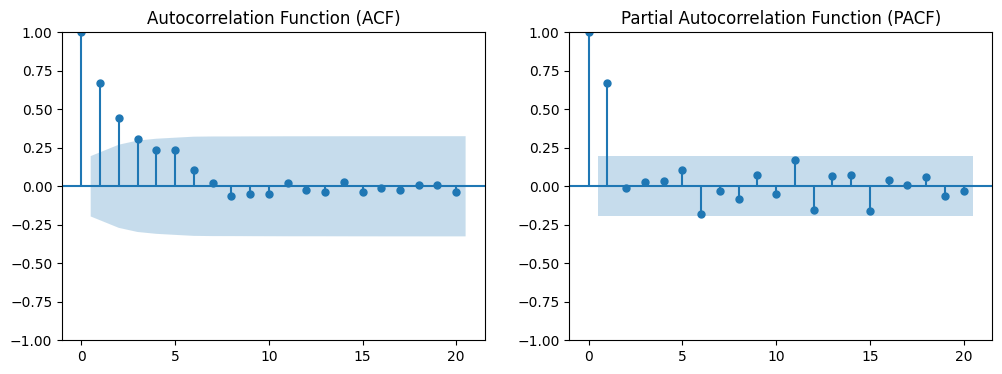


=== Ljung-Box Test ===
      lb_stat     lb_pvalue
10  90.797431  3.720876e-15

=== Augmented Dickey-Fuller Test ===
   Test Statistic   p-value                                    Critical Values
0       -4.378482  0.000324  {'1%': -3.498198082189098, '5%': -2.8912082118...

=== Parameter Estimates & Confidence Intervals ===
   Estimate  Standard Error  95% CI Lower  95% CI Upper
0 -0.347420        0.270521     -0.877631      0.182791
1  0.664371        0.069511      0.528131      0.800610
2  0.812335        0.123315      0.570642      1.054028

=== Model Diagnostics Decision ===
Stationarity: Stationary
White Noise: Likely Autocorrelated
Model Significance: Good Fit


In [21]:
# Flow 2: Model Diagnostics
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(42)
n = 100
phi = 0.7
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Compute Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)
# ---------------------------
lags = 20
acf_values = acf(y, nlags=lags)
pacf_values = pacf(y, nlags=lags)

# Plot ACF & PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(y, lags=lags, ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")

sm.graphics.tsa.plot_pacf(y, lags=lags, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

# ---------------------------
# 3. Perform Ljung-Box Test (Checking White Noise)
# ---------------------------
ljung_box_results = acorr_ljungbox(y, lags=[10], return_df=True)
print("\n=== Ljung-Box Test ===")
print(ljung_box_results)

# ---------------------------
# 4. Perform Augmented Dickey-Fuller (ADF) Test (Stationarity Check)
# ---------------------------
adf_test = adfuller(y)
adf_results = pd.DataFrame({
    "Test Statistic": [adf_test[0]],
    "p-value": [adf_test[1]],
    "Critical Values": [adf_test[4]]  # Critical values are a dictionary, so we convert to string for display
})

print("\n=== Augmented Dickey-Fuller Test ===")
print(adf_results)

# ---------------------------
# 5. Compute Standard Error and Confidence Interval
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()
params = model.params
se = model.bse
conf_intervals = model.conf_int()

# Ensure conf_intervals is a DataFrame (in case it's a NumPy array)
if not isinstance(conf_intervals, pd.DataFrame):
    conf_intervals = pd.DataFrame(conf_intervals, columns=["95% CI Lower", "95% CI Upper"])

print("\n=== Parameter Estimates & Confidence Intervals ===")
summary_table = pd.DataFrame({
    "Estimate": params,
    "Standard Error": se,
    "95% CI Lower": conf_intervals.iloc[:, 0],
    "95% CI Upper": conf_intervals.iloc[:, 1]
})
print(summary_table)

# ---------------------------
# 6. Decision Based on Model Diagnostics
# ---------------------------
decision_criteria = {
    "Stationarity": "Stationary" if adf_test[1] < 0.05 else "Non-Stationary",
    "White Noise": "Likely White Noise" if ljung_box_results['lb_pvalue'].values[0] > 0.05 else "Likely Autocorrelated",
    "Model Significance": "Good Fit" if abs(params[1]) > 2 * se[1] else "Needs Improvement"  # Check if coefficient is significant
}

print("\n=== Model Diagnostics Decision ===")
for key, value in decision_criteria.items():
    print(f"{key}: {value}")


=== One-Step Ahead Forecast ===
[-0.41209022]

=== Multi-Step Ahead Forecast ===
     Forecast
100 -0.412090
101 -0.390385
102 -0.375965
103 -0.366384
104 -0.360019
105 -0.355790
106 -0.352981
107 -0.351115
108 -0.349874
109 -0.349051

=== Prediction Interval ===
[[-2.17859834  1.35441791]
 [-2.51121639  1.73044649]
 [-2.63558479  1.88365559]
 [-2.68462244  1.95185414]
 [-2.70366448  1.98362613]
 [-2.71056294  1.99898199]
 [-2.71264822  2.00668612]
 [-2.71293896  2.01070987]
 [-2.71265047  2.01290147]
 [-2.7122465   2.0141452 ]]

=== Forecast Errors and Confidence Interval ===
     Forecast  95% CI Lower  95% CI Upper
100 -0.412090     -2.179212      1.355031
101 -0.390385     -2.157506      1.376737
102 -0.375965     -2.143086      1.391157
103 -0.366384     -2.133506      1.400737
104 -0.360019     -2.127141      1.407102
105 -0.355790     -2.122912      1.411331
106 -0.352981     -2.120103      1.414140
107 -0.351115     -2.118236      1.416007
108 -0.349874     -2.116996      1.41

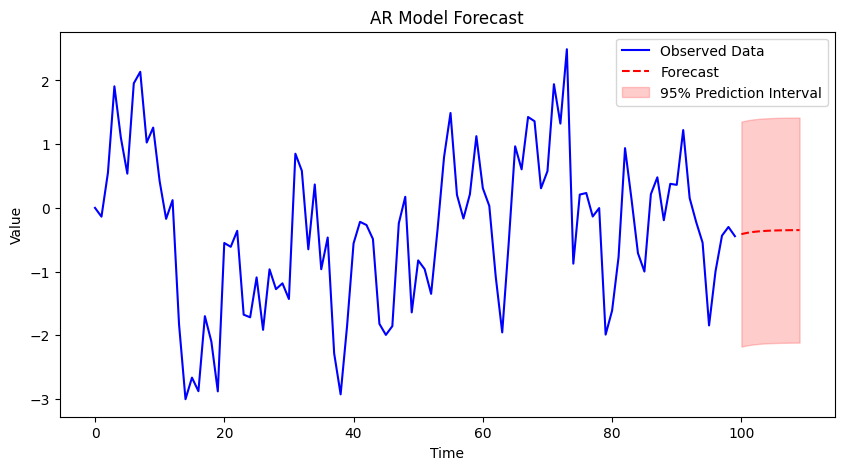


=== Forecasting Decision ===
Forecast Stability: Stable Forecast
Prediction Interval Width: Uncertain
Error Magnitude: Acceptable


In [22]:
# Flow 3: Forecasting Future Values
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
np.random.seed(42)
n = 100
phi = 0.7
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Fit AR Model (Using Best-Fitting Line)
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()
forecast_steps = 10  # Number of future points to predict

# ---------------------------
# 3. Compute One-Step Ahead Forecasting
# ---------------------------
one_step_forecast = model.forecast(steps=1)
print("\n=== One-Step Ahead Forecast ===")
print(one_step_forecast)

# ---------------------------
# 4. Compute Multi-Step Ahead Forecasting
# ---------------------------
multi_step_forecast = model.forecast(steps=forecast_steps)
forecast_index = np.arange(len(y), len(y) + forecast_steps)

print("\n=== Multi-Step Ahead Forecast ===")
print(pd.DataFrame({"Forecast": multi_step_forecast}, index=forecast_index))

# ---------------------------
# 5. Compute Prediction Interval
# ---------------------------
pred_interval = model.get_forecast(steps=forecast_steps).conf_int()
print("\n=== Prediction Interval ===")
print(pred_interval)

# ---------------------------
# 6. Compute Forecast Errors and Confidence Interval
# ---------------------------
residuals = y - model.fittedvalues
forecast_error = np.std(residuals)  # Standard deviation of residuals

conf_int_lower = multi_step_forecast - 1.96 * forecast_error
conf_int_upper = multi_step_forecast + 1.96 * forecast_error

forecast_results = pd.DataFrame({
    "Forecast": multi_step_forecast,
    "95% CI Lower": conf_int_lower,
    "95% CI Upper": conf_int_upper
}, index=forecast_index)

print("\n=== Forecast Errors and Confidence Interval ===")
print(forecast_results)

# ---------------------------
# 7. Visualization of Forecasts
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y, label="Observed Data", color="blue")
plt.plot(forecast_index, multi_step_forecast, label="Forecast", color="red", linestyle="dashed")
plt.fill_between(forecast_index, conf_int_lower, conf_int_upper, color="red", alpha=0.2, label="95% Prediction Interval")
plt.legend()
plt.title("AR Model Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# ---------------------------
# 8. Decision Based on Forecasting
# ---------------------------
decision_criteria = {
    "Forecast Stability": "Stable Forecast" if np.abs(multi_step_forecast[-1] - multi_step_forecast[0]) < 2 else "Unstable Forecast",
    "Prediction Interval Width": "Reliable" if (conf_int_upper[-1] - conf_int_lower[-1]) < 3 else "Uncertain",
    "Error Magnitude": "Acceptable" if forecast_error < 1 else "High Variability"
}

print("\n=== Forecasting Decision ===")
for key, value in decision_criteria.items():
    print(f"{key}: {value}")


=== Durbin-Watson Test ===
Statistic: 1.9728
Decision: No significant autocorrelation

=== Jarque-Bera Test ===
Statistic: 0.5724, p-value: 0.7511
Decision: Residuals are normally distributed


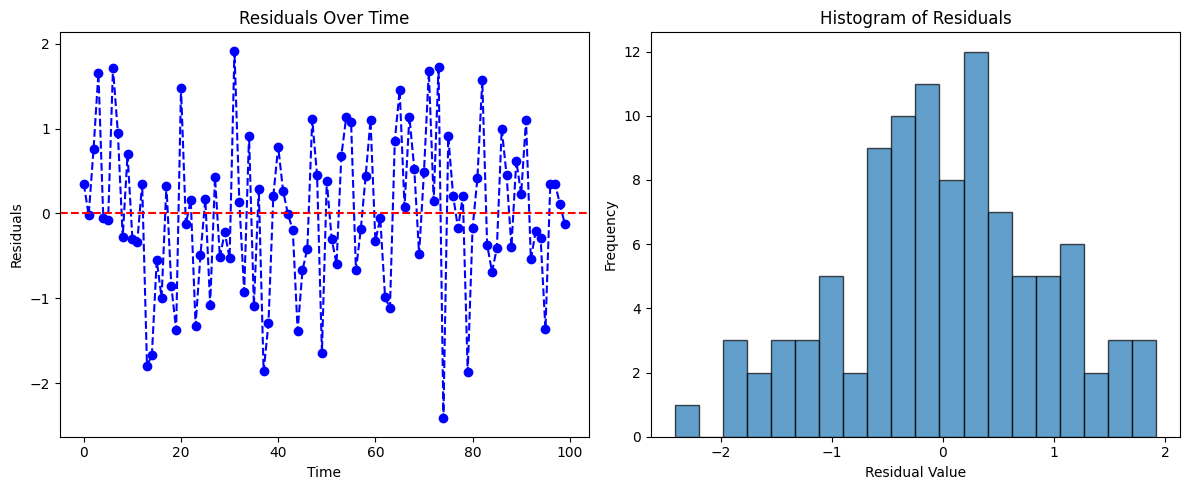


=== Residual Analysis Decision ===
Autocorrelation Check: No significant autocorrelation
Normality Check: Residuals are normally distributed


In [24]:
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
np.random.seed(42)
n = 100
phi = 0.7
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Fit AR Model
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()

# Extract Residuals
residuals = model.resid

# ---------------------------
# 3. Perform Durbin-Watson Test (Check for Autocorrelation)
# ---------------------------
dw_stat = durbin_watson(residuals)
print(f"\n=== Durbin-Watson Test ===\nStatistic: {dw_stat:.4f}")

# Interpretation:
if dw_stat < 1.5:
    dw_result = "Positive autocorrelation detected"
elif dw_stat > 2.5:
    dw_result = "Negative autocorrelation detected"
else:
    dw_result = "No significant autocorrelation"

print(f"Decision: {dw_result}")

# ---------------------------
# 4. Perform Jarque-Bera Test (Check for Normality of Residuals)
# ---------------------------
jb_stat, jb_pval, skew, kurtosis = jarque_bera(residuals)
print(f"\n=== Jarque-Bera Test ===\nStatistic: {jb_stat:.4f}, p-value: {jb_pval:.4f}")

# Interpretation:
jb_result = "Residuals are normally distributed" if jb_pval > 0.05 else "Residuals deviate from normality"
print(f"Decision: {jb_result}")

# ---------------------------
# 5. Visualization of Residuals
# ---------------------------
plt.figure(figsize=(12, 5))

# Residuals Plot
plt.subplot(1, 2, 1)
plt.plot(residuals, marker="o", linestyle="dashed", color="blue")
plt.axhline(y=0, color="red", linestyle="dashed")
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residuals")

# Histogram of Residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---------------------------
# 6. Final Decision Based on Residual Analysis
# ---------------------------
decision_criteria = {
    "Autocorrelation Check": dw_result,
    "Normality Check": jb_result
}

print("\n=== Residual Analysis Decision ===")
for key, value in decision_criteria.items():
    print(f"{key}: {value}")

In [25]:
# Flow 5: Stability Analysis
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
np.random.seed(42)
n = 100
phi = 0.7  # AR(1) coefficient
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Fit AR Model
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()

# Extract AR(1) coefficient
ar_params = model.arparams
phi_hat = ar_params[0]

# ---------------------------
# 3. Compute Characteristic Roots
# ---------------------------
char_roots = np.roots(np.r_[1, -ar_params])  # Solve AR characteristic equation
modulus_roots = np.abs(char_roots)

print("\n=== Characteristic Roots ===")
print(f"Roots: {char_roots}")
print(f"Modulus of Roots: {modulus_roots}")

# Stability Check: All modulus values must be < 1
if np.all(modulus_roots < 1):
    stability_result = "The AR model is stable (stationary)."
else:
    stability_result = "The AR model is unstable (non-stationary)."

print(f"Decision: {stability_result}")

# ---------------------------
# 4. Compute Mean Reversion Time
# ---------------------------
if phi_hat < 1:
    mean_reversion_time = -1 / np.log(np.abs(phi_hat))
    print(f"\n=== Mean Reversion Time ===\nτ = {mean_reversion_time:.4f} time steps")
else:
    mean_reversion_time = np.inf  # Infinite if the process is non-stationary
    print("\n=== Mean Reversion Time ===\nτ = ∞ (Non-stationary process)")

# ---------------------------
# 5. Final Decision Based on Stability Analysis
# ---------------------------
decision_criteria = {
    "Characteristic Roots Check": stability_result,
    "Mean Reversion Time": f"{mean_reversion_time:.4f} steps" if mean_reversion_time != np.inf else "∞ (Non-stationary)"
}

print("\n=== Stability Analysis Decision ===")
for key, value in decision_criteria.items():
    print(f"{key}: {value}")


=== Characteristic Roots ===
Roots: [0.6643707]
Modulus of Roots: [0.6643707]
Decision: The AR model is stable (stationary).

=== Mean Reversion Time ===
τ = 2.4455 time steps

=== Stability Analysis Decision ===
Characteristic Roots Check: The AR model is stable (stationary).
Mean Reversion Time: 2.4455 steps


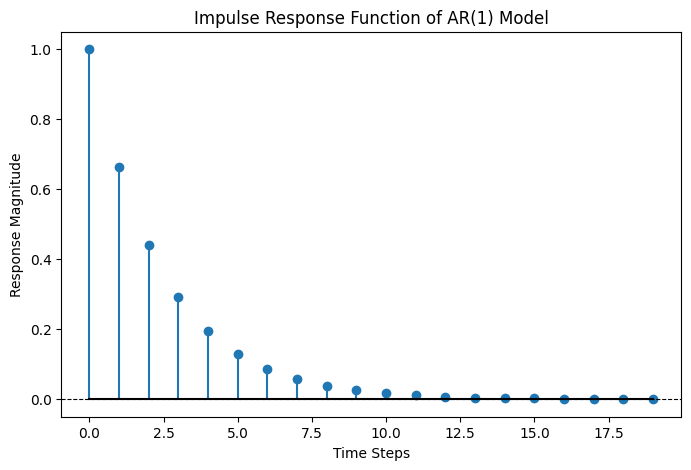


=== Impulse Response Function Decision ===
Decision: The AR model is stable; shocks dissipate over time.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
np.random.seed(42)
n = 100
phi = 0.7  # AR(1) coefficient
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Fit AR Model
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()

# Extract AR coefficient
ar_params = model.arparams
phi_hat = ar_params[0] if len(ar_params) > 0 else 0  # Ensure extraction is safe

# ---------------------------
# 3. Compute Impulse Response Function
# ---------------------------
num_lags = 20  # Number of time steps to observe the response
impulse_response = np.zeros(num_lags)
impulse_response[0] = 1  # Shock at t=0

for t in range(1, num_lags):
    impulse_response[t] = phi_hat * impulse_response[t - 1]

# ---------------------------
# 4. Plot Impulse Response Function
# ---------------------------
plt.figure(figsize=(8, 5))
plt.stem(range(num_lags), impulse_response, basefmt="k-")  # Removed 'use_line_collection'
plt.xlabel("Time Steps")
plt.ylabel("Response Magnitude")
plt.title("Impulse Response Function of AR(1) Model")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.show()

# ---------------------------
# 5. Decision Based on IRF Behavior
# ---------------------------
if np.abs(phi_hat) < 1:
    decision = "The AR model is stable; shocks dissipate over time."
else:
    decision = "The AR model is unstable; shocks persist indefinitely."

print("\n=== Impulse Response Function Decision ===")
print(f"Decision: {decision}")

In [28]:
# Flow 7: Information Criteria
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Generate Synthetic AR(1) Data (Referencing Main AR Model Flow)
# ---------------------------
np.random.seed(42)
n = 100
phi = 0.7  # AR(1) coefficient
errors = np.random.normal(0, 1, n)
y = np.zeros(n)

for t in range(1, n):
    y[t] = phi * y[t - 1] + errors[t]

# ---------------------------
# 2. Fit AR Model
# ---------------------------
model = ARIMA(y, order=(1, 0, 0)).fit()

# ---------------------------
# 3. Compute Information Criteria
# ---------------------------
aic_value = model.aic
bic_value = model.bic

print("\n=== Information Criteria ===")
print(f"Akaike Information Criterion (AIC): {aic_value:.4f}")
print(f"Bayesian Information Criterion (BIC): {bic_value:.4f}")

# ---------------------------
# 4. Decision Based on AIC & BIC
# ---------------------------
if aic_value < bic_value:
    decision = "AIC suggests the model is a better fit (lower complexity)."
elif bic_value < aic_value:
    decision = "BIC suggests the model is a better fit (more penalty on complexity)."
else:
    decision = "AIC and BIC are equal, suggesting an optimal balance between fit and complexity."

print("\n=== Information Criteria Decision ===")
print(f"Decision: {decision}")


=== Information Criteria ===
Akaike Information Criterion (AIC): 269.5866
Bayesian Information Criterion (BIC): 277.4021

=== Information Criteria Decision ===
Decision: AIC suggests the model is a better fit (lower complexity).
